In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../finalMerge.csv", delimiter=',')
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           8760 non-null   object 
 1   Hour                                                           8760 non-null   int64  
 2   Hourly average wind (0.1 m/s)                                  8760 non-null   int64  
 3   Temperature at 1.5m height (0.1 degrees)                       8760 non-null   int64  
 4   Duration of sunshine per hour (0.1 hours) (-1 for <0.05 hour)  8760 non-null   int64  
 5   Fog (1 or 0)                                                   8760 non-null   int64  
 6   Rain (1 or 0)                                                  8760 non-null   int64  
 7   Snow (1 or 0)                                               

Index(['Date', 'Hour', 'Hourly average wind (0.1 m/s)',
       'Temperature at 1.5m height (0.1 degrees) ',
       'Duration of sunshine per hour (0.1 hours) (-1 for <0.05 hour)',
       'Fog (1 or 0)', 'Rain (1 or 0)', 'Snow (1 or 0)', 'Thunder (1 or 0)',
       'Ice formation (1 or 0)', 'Hour of year', 'NL national holiday',
       'BE national holiday', 'DE national holiday', 'FR national holiday',
       'NL school holiday', 'BE school holiday', 'DE school holiday',
       'FR school holiday', 'Opening_duration_in_seconds',
       'object intensity West 2023', 'object intensity East 2023'],
      dtype='object')

In [3]:
X = df[['Date', 'Hour', 'Hourly average wind (0.1 m/s)',
       'Temperature at 1.5m height (0.1 degrees) ',
       'Duration of sunshine per hour (0.1 hours) (-1 for <0.05 hour)',
       'Fog (1 or 0)', 'Rain (1 or 0)', 'Snow (1 or 0)', 'Thunder (1 or 0)',
       'Ice formation (1 or 0)', 'NL national holiday',
       'BE national holiday', 'DE national holiday', 'FR national holiday',
       'NL school holiday', 'BE school holiday', 'DE school holiday',
       'FR school holiday', 'Opening_duration_in_seconds',
       ]]
y = df['object intensity East 2023']

In [4]:
X['Date'] = pd.to_datetime(X['Date']).dt.dayofyear

C:\Users\lordn\AppData\Local\Temp\ipykernel_67828\2109532498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_datetime(X['Date']).dt.dayofyear


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)

In [9]:
print(mse)

716.0949081500562


In [10]:
correlation = np.corrcoef(y_test, y_pred)[0, 1]

In [11]:
correlation

0.5267212266389827

In [12]:
coefficients = model.coef_

In [13]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute Coefficient', ascending=False)

C:\Users\lordn\AppData\Local\Temp\ipykernel_67828\682847832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance, palette='viridis')


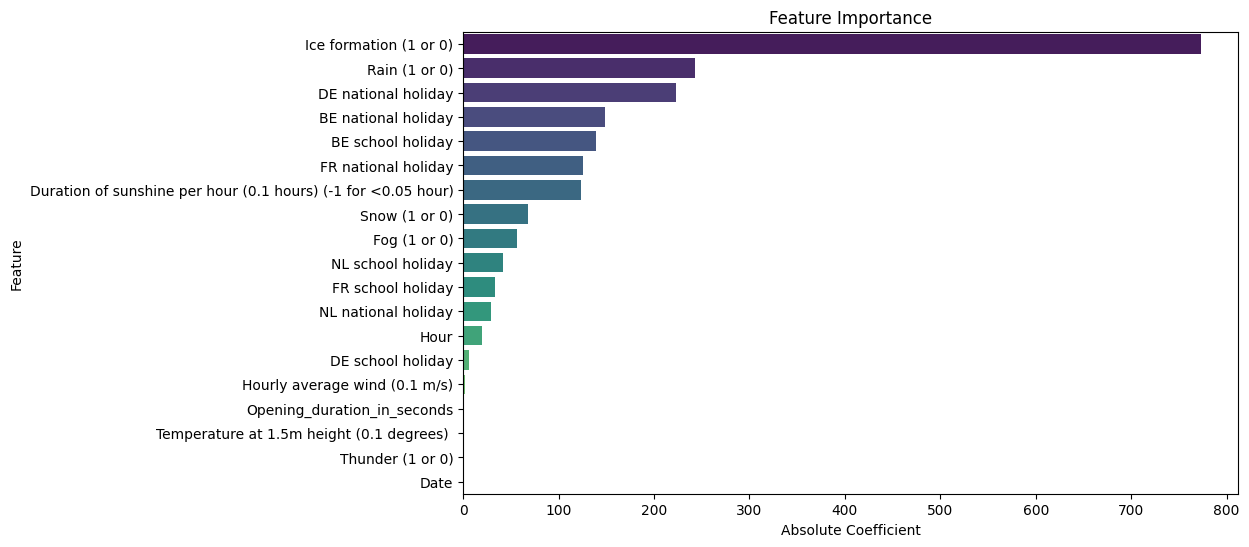

In [14]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()